# Übung Analysis

**Python kann bei vielen der Aufgaben unterstützend helfen.**

## Aufgabe 1
Beweisen Sie durch Induktion.
  $$
  \forall n\in\mathbb{N}:\sum_{k=0}^n k^2 = \frac{n\cdot(n+1)\cdot(2n+1)}{6}.
  $$
 
**Induktionsanfang**
Für $n_0=0$ gilt:
$$
\forall n\in\mathbb{N}:\sum_{k=0}^{n_0} k^2 = \forall n\in\mathbb{N}:\sum_{k=0}^{0} k^2 = 0^2 = 0 = \frac{0\cdot 1\cdot 2}{6}.
$$

**Induktionsvoraussetzung**
Für ein beliebiges aber festes $m\geq n_0$ gilt
$$
\forall n\in\mathbb{N}:\sum_{k=0}^{m} k^2 = \frac{m\cdot(m+1)\cdot(2m+1)}{6}
$$

**Induktionsbehauptung**
Unter der Annahme der Induktionsvoraussetzung gilt für $m+1$
$$
\forall n\in\mathbb{N}:\sum_{k=0}^{m+1} k^2 = \frac{(m+1)\cdot((m+1)+1)\cdot(2(m+1)+1)}{6} = \frac{(m+1)(m+2)\cdot(2m+3)}{6}  = \frac{(m^2+2m+m +2)\cdot(2m+3)}{6} = \frac{(2m^3 + 6m^2 + 4m + 3m^2 + 9m +6)}{6} = \frac{2m^3 + 9m ^2 + 13m + 6}{6}
$$

**Induktionsschritt**
$$
\begin{align}
\sum\limits_{k=0}^{m+1}k^2=(m+1)^2+\sum\limits_{k=0}^{m+1}k^2&=(m+1)^2+\frac{2m^3+3m^2+m}{6}\\
&=\frac{6(m+1)^2+2m^3+3m^2+m}{6}\\
&=\frac{2m^3+3m^2+m+6m^2+12m+6}{6}\\
&=\frac{2m^3+9m^2+13m+6}{6}\\
\end{align}
$$

## Aufgabe 2
Fasse die folgende Summe zusammen und berechne den Wert (Überprüfe in Python).

$$\sum_{v=2}^{14} (v-1)^2 + \sum_{w=-2}^8 2\cdot(w+3) + \sum_{k=10}^{31} 1$$

Für die Lösung müssen wir zuerst einmal alle Indizes auf $0$ verschieben.

$$\sum_{v=0}^{12} (v+1)^2 + \sum_{w=0}^{10} 2\cdot(w+1) + \sum_{k=0}^{21} 1$$

Nun können wir die Summen zusammenziehen, aber müssen auf die oberen Grenzen aufpassen (die kleinste ist $10$). Die Indexvariable können wir dazu einfach umbenennen. 

$$\sum_{i=0}^{10} ((i+1)^2 + 2\cdot (i+1) + 1) + \sum_{i=11}^{12} (i+1)^2 + \sum_{i=11}^{21} 1$$

Wir können die hinteren beiden Termine einfach ausrechnen.

$$\sum_{i=0}^{10} ((i+1)^2 + 2\cdot (i+1) + 1) + 144 + 169 + 11 = \sum_{i=0}^{10} ((i+1)^2 + 2\cdot (i+1) + 1) +324$$

Wir können nun sehr einfach in Python testen ob wir dies korrekt getan haben und wir können die Zeit messen. Die Zusammenfassung kann schneller berechnet werden.

In [6]:
from time import time

n = 100000
start = time()
for j in range(n):
    summe = 0
    for v in range(2,15):
        summe += (v-1)**2
    for w in range(-2,9):
        summe += 2*(w+3)
    for k in range(10,32):
        summe += 1
print(f"Dauer {time()-start}s")
print(summe)

start = time()
for j in range(n):
    summe = 324
    for i in range(11):
        summe += ((i+1)**2 + 2*(i+1)+1)
print(f"Dauer {time()-start}s")
print(summe)

Dauer 1.9246151447296143s
973
Dauer 1.1911182403564453s
973


## Aufgabe 3

Berechne die Lösungsmenge der Ungleichung $|x-3| \leq |x-9|$.

Auch dies wird über eine Fallunterscheidung gelöst.

1. Fall, da positiv sein sollen folgt, dass $x\geq 9$ sein muss. Wir lösen also beide Klammern auf und stellen um.
$$
x-3\leq x-9 \leftrightarrow 0\leq -6
$$
Dies ist eine falsche Aussage und somit ist $x<9$

2. Fall, $x-3$ positiv und $x-9$ negativ. Das heißt $x\geq 3\land x<9$. Wir können nun die Klammern auflösen und umstellen.
$$
x-3 \leq -x+9 \leftrightarrow 2x\leq 12 \leftrightarrow x\leq 6
$$
Dies Einschränkung $x\leq 6$ ist stärker als $x\geq 3$ und somit sind der Bereich eingeschränkter. 

3. Fall, beide sollen negativ sein. Es folgt also, dass $x<3$ sein muss. Wir lösen beide Klammern auf und stellen um.
$$
-x+3 \leq -x+9 \leftrightarrow 0<6
$$
Dies ist eine wahre Aussage. 

Insgesamt ist $x\leq 6$. Wir können dies visuell bestätigen.

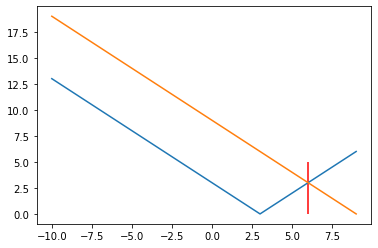

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def u1(x):
    return np.abs(x-3)
def u2(x):
    return np.abs(x-9)

# zeichnen beider ungleichungen
plt.plot(np.arange(-10,10), [u1(x) for x in np.arange(-10,10)])
plt.plot(np.arange(-10,10), [u2(x) for x in np.arange(-10,10)])

# vertikale rote line bei 6 von y=0 bis y=5
plt.vlines(6, 0, 5, "r")
plt.show()

## Aufgabe 4
Bestimmen Sie die erste Ableitung der Funktion
  $$
   f(x) = \frac{x^3+7}{cos\left(\frac{\pi x}{5}\right)}
  $$
  
und testen Sie dies in Python mit Hilfe des Differentialquotient

$$
    f'(x) = \lim_{e\rightarrow 0}\frac{f(x+e)-f(x)}{e}
$$

für verschiedene Werte.

### Lösung

Zuerst berechnen wir die Ableitung. Im ersten Schritt nutzen wir die Quotientenregel.
$$
f'(x) = \frac{3x^2\cdot cos\left(\frac{\pi x}{5}\right) - (x^3+7)\cdot \left(cos\left(\frac{\pi x}{5}\right)\right)'}{cos\left(\frac{\pi x}{5}\right)^2}
$$

Nun müssen wir den fehlenden Term $\left(cos\left(\frac{\pi x}{5}\right)\right)'$ mittels der Kettenregel ableiten. Hierzu benötigen wir, dass die Ableitung von $cos$ gleich $-sin$ ist.

$$
f'(x) = \frac{3x^2\cdot cos\left(\frac{\pi x}{5}\right) - (x^3+7)\cdot \left(-sin\left(\frac{\pi x}{5}\right)\cdot \frac{\pi}{5}\right)}{cos\left(\frac{\pi x}{5}\right)^2}
$$

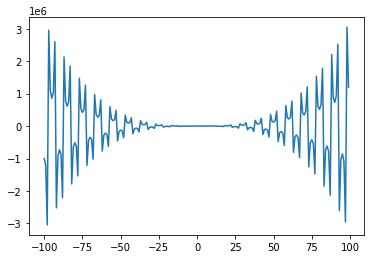

In [27]:
# Funktionsdefinition
def f(x):
    return (x**3+7)/np.cos((np.pi * x)/5)

# Ableitung
def g(x):
    return ((3*x**2+7)*np.cos((np.pi * x)/5)+(x**3+7)*np.sin((np.pi * x)/5)*(np.pi)/5)/np.cos((np.pi * x)/5)**2

# Differentialquotient
def dq(x,e):
    return (f(x+e)-f(x))/e
    
# Wir können nun die Funktion auf der Skala -100 und 100 plotten
plt.plot(np.arange(-100,100), [f(x) for x in np.arange(-100,100)])
plt.show()

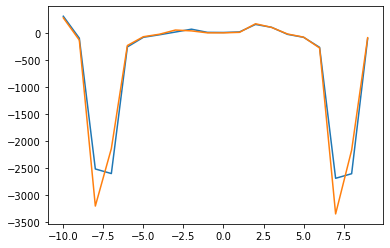

In [28]:
# Wir schauen uns nun die Unterschiede zwischen der Ableitung der Approximation
# mit e = 0.1 an
plt.plot(np.arange(-10,10), [g(x) for x in np.arange(-10,10)])
plt.plot(np.arange(-10,10), [dq(x, 0.1) for x in np.arange(-10,10)])

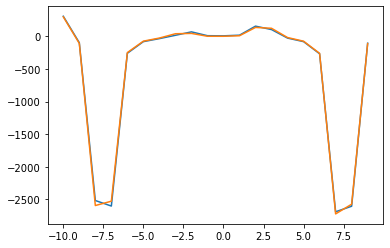

In [29]:
# Umso kleiner wir e setzen umso genauer wird diese Approximation
plt.plot(np.arange(-10,10), [g(x) for x in np.arange(-10,10)])
plt.plot(np.arange(-10,10), [dq(x, 0.01) for x in np.arange(-10,10)])